In [1]:
!pip install nbconvert[webpdf]
from scipy.stats import invgamma, t
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
y = np.array([495, 541, 1461, 1555, 1603, 2201, 2750, 3468, 3516, 4319, 6622, 7728, 13159, 21194])
_lambda = np.linspace(1000, 12000, 100)
prior = (8.25, 32625)
llh = (13, 70612)
post = (22.25, 103237)

In [3]:
print(y.mean(), y.std(), y.sum())

5043.714285714285 5560.580871874184 70612


In [4]:
1/prior[1]

3.065134099616858e-05

In [5]:
vals_prior = invgamma.pdf(_lambda, prior[0], scale=1/prior[1], loc=0)
vals_llh = invgamma.pdf(_lambda, llh[0], scale=1/llh[1])
vals_post = invgamma.pdf(_lambda, post[0], scale=1/post[1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  after removing the cwd from sys.path.


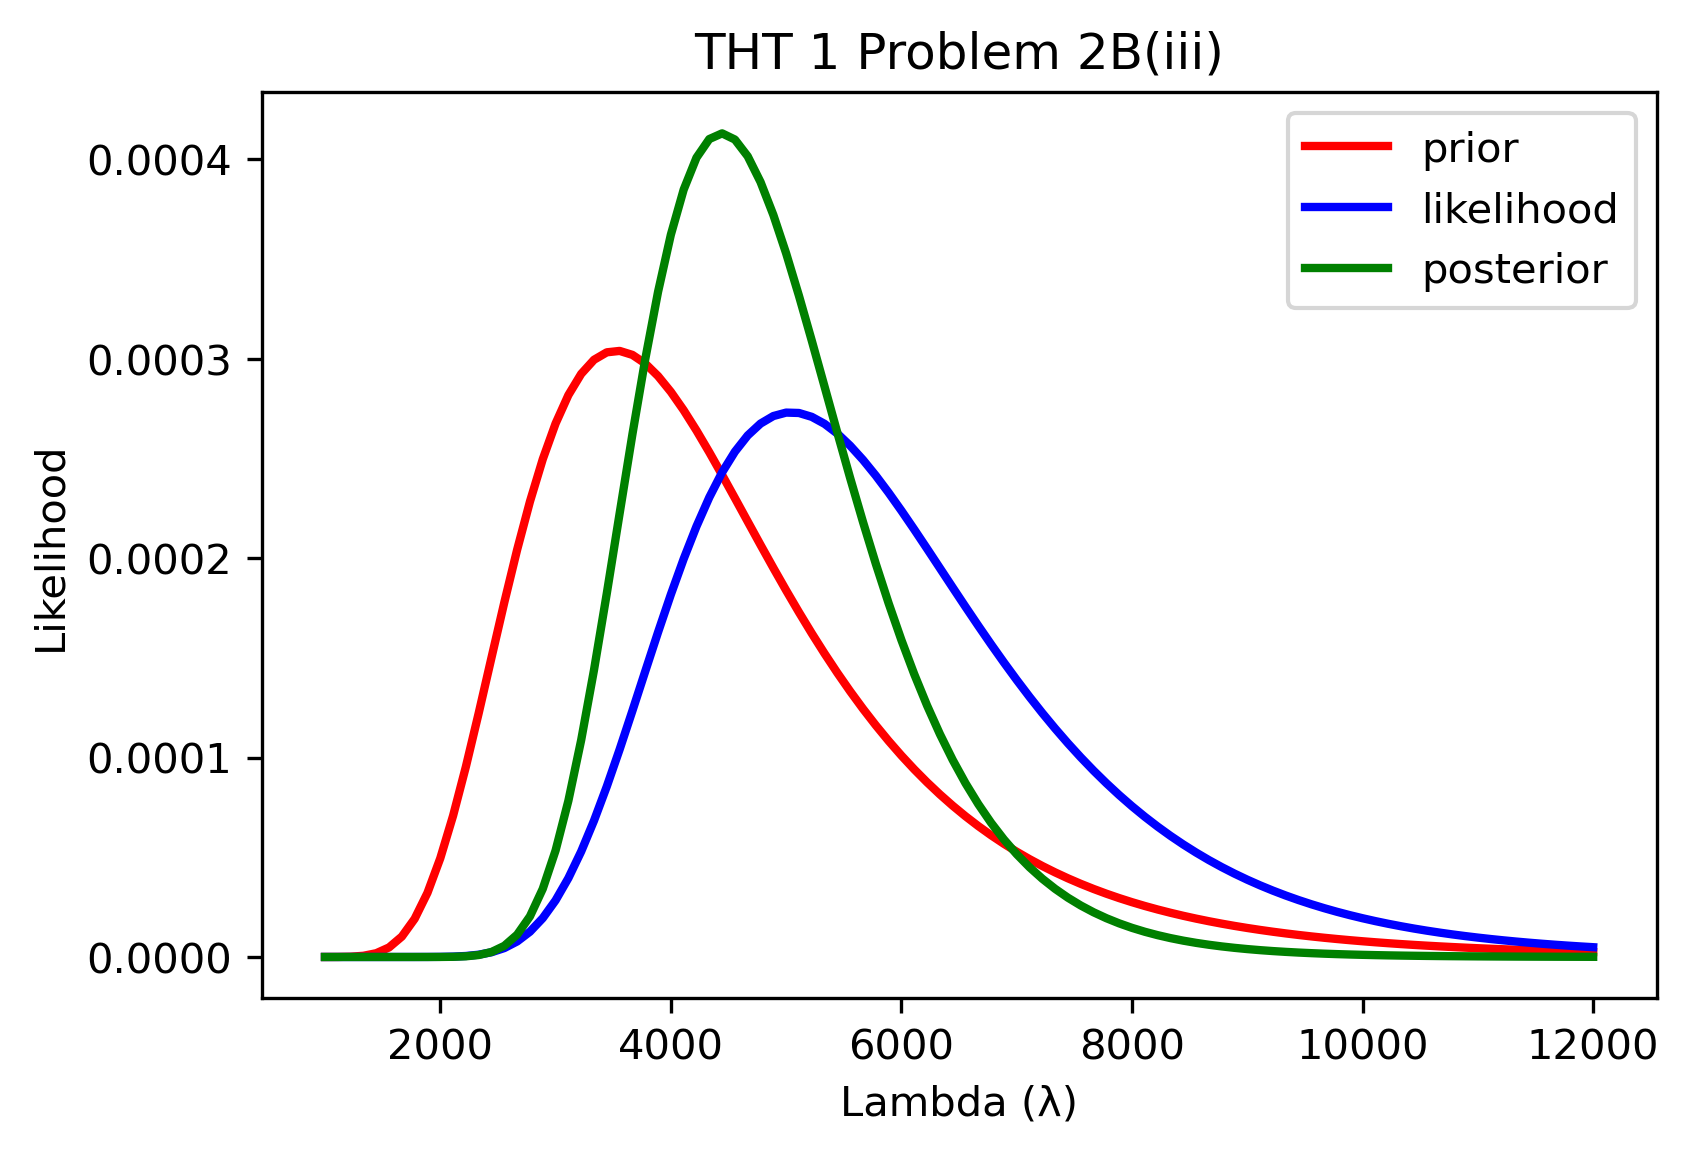

In [6]:
fig, ax = plt.subplots(dpi=300)
ax.plot(_lambda, invgamma.pdf(_lambda, prior[0], scale=prior[1]), 'k-', lw=2, color='red', label='prior')
ax.plot(_lambda, invgamma.pdf(_lambda, llh[0], scale=llh[1]), 'k-', lw=2, color='blue', label='likelihood')
ax.plot(_lambda, invgamma.pdf(_lambda, post[0], scale=post[1]), 'k-', lw=2, color='green', label='posterior')
ax.legend(loc='best')
# plt.axvline(4858, ls='--', color='green')
# plt.axvline(4500, ls='--', color='red')
# plt.axvline(5884, ls='--', color='blue')
ax.set_title("THT 1 Problem 2B(iii)")

plt.xlabel('Lambda (λ)')
plt.ylabel('Likelihood')
plt.savefig('tht2b-iii.jpg')

In [7]:
print(invgamma.ppf(0.001/2, 8.25, scale=32625), invgamma.ppf(1-0.001/2, 8.25, scale=32625))

1550.035507039743 17371.91222228138


In [8]:
print(invgamma.ppf(0.001/2, 13, scale=70612), invgamma.ppf(1-0.001/2, 13, scale=70612))

2503.6657703118362 16540.742732448463


In [9]:
print(invgamma.ppf(0.001/2, 22.25, scale=103237), invgamma.ppf(1-0.001/2, 22.25, scale=103237))

2511.782643517697 10423.187935520164


In [10]:
prior_lambda_mle = prior[1]/(prior[0]-1)
prior_var_mle = prior[1]**2/(prior[0]-1**2)*(prior[0]-2)
prior_sigma_mle = np.sqrt(prior_var_mle)
prior_se_mle = prior_sigma_mle
prior_lambda_mle, prior_var_mle, prior_sigma_mle

(4500.0, 917578125.0, 30291.552040131584)

In [11]:
def ig_mean_se_mle(dist):
    lambda_mle = dist[1]/(dist[0]-1)
    var_mle = (dist[1]**2)/(((dist[0]-1)**2)*(dist[0]-2))
    sigma_mle = var_mle**0.5
    se_mle = sigma_mle / ((dist[0]-1)**0.5)
    print(var_mle, sigma_mle)
    return lambda_mle, se_mle
    

In [12]:
prior_l_mle, prior_se_mle = ig_mean_se_mle(prior)
post_l_mle, post_se_mle = ig_mean_se_mle(post)
llh_l_mle, llh_se_mle = ig_mean_se_mle(llh)
print(prior_lambda_mle, prior_se_mle)

3240000.0 1800.0
1165541.8049741553 1079.602614379085
3147761.707070707 1774.193255277087
4500.0 668.5032174373868


In [13]:
print(prior_l_mle, prior_se_mle)
print(post_l_mle, post_se_mle)
print(llh_l_mle, llh_se_mle)

t_prior = t.ppf(0.999, 7)
t_llh = t.ppf(0.999, 14)
t_post = t.ppf(0.999, 21)

4500.0 668.5032174373868
4858.211764705882 234.19868939947304
5884.333333333333 512.1654767643223


In [14]:
def confidence_interval(l, se, percent, n):
    t_val = t.ppf(percent, n)
    lower_bound = l - (se * t_val)
    upper_bound = l + (se * t_val)
    return (lower_bound, upper_bound)

In [15]:
prior_ci = confidence_interval(prior_l_mle, prior_se_mle, 0.999, 7)
llh_ci = confidence_interval(llh_l_mle, llh_se_mle, 0.999, 14)
post_ci = confidence_interval(post_l_mle, post_se_mle, 0.999, 21)
print(f'prior: {prior_ci}')
print(f'llh: {llh_ci}')
print(f'post: {post_ci}')

prior: (1301.0184868782735, 7698.9815131217265)
llh: (3944.5628033761864, 7824.10386329048)
post: (4032.1569982197657, 5684.266531191998)


In [16]:
def F_inv(lambda_hat, p):
    import math
    out = -lambda_hat * np.log(1-p)
    return out

In [17]:
n = len(y)
ps = (np.linspace(1, n, n) - 0.5) / n
print(ps)
quantiles = F_inv(y.mean(), ps)

[0.03571429 0.10714286 0.17857143 0.25       0.32142857 0.39285714
 0.46428571 0.53571429 0.60714286 0.67857143 0.75       0.82142857
 0.89285714 0.96428571]


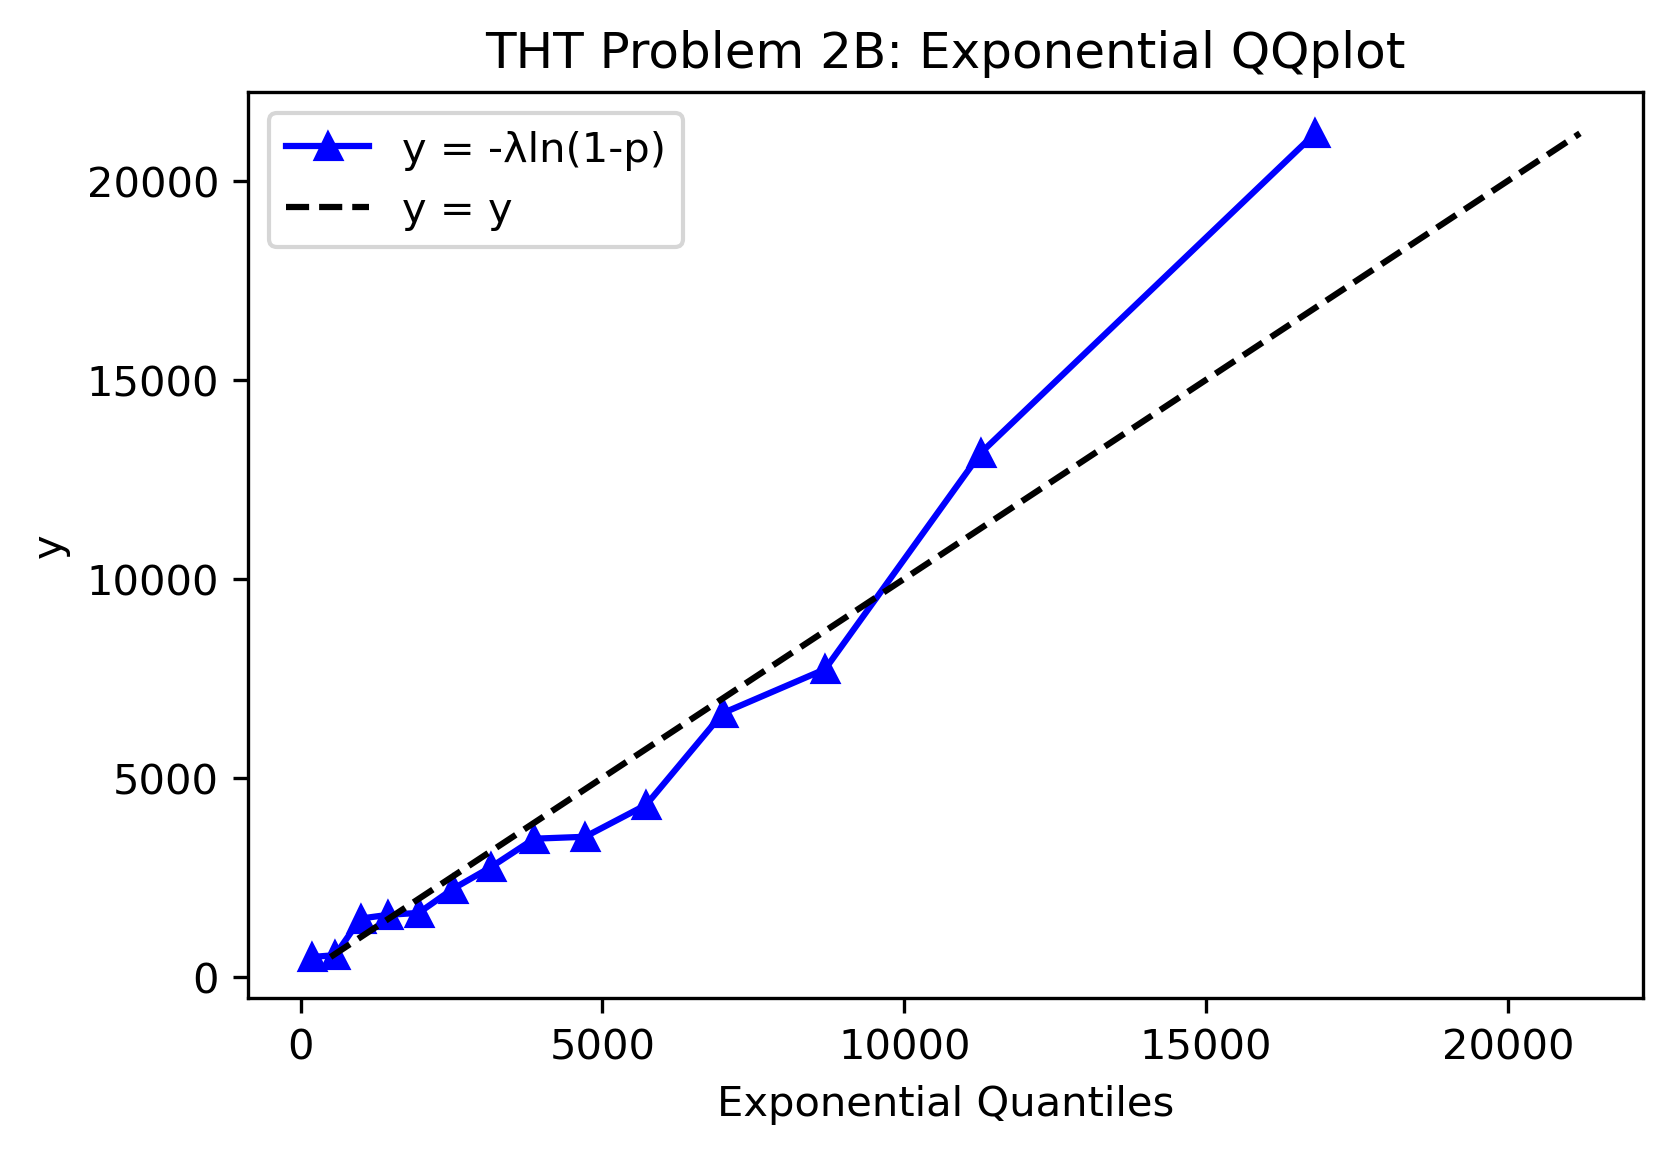

In [18]:
fig, ax = plt.subplots(dpi=300)
ax.plot(quantiles, y, '^b-', label='y = -λln(1-p)')
ax.plot(y, y, 'k--', label='y = y')
plt.title('THT Problem 2B: Exponential QQplot')
plt.xlabel('Exponential Quantiles')
plt.ylabel('y')
ax.legend()
plt.savefig('tht2b-exp-qqplot.jpg')

In [19]:
import math
p = np.linspace(0.01, 0.99, 99)

lambda_hat = 5043
epdf = 1 - np.exp((-y/lambda_hat))
ecdf = -lambda_hat * np.log(1-p)
ecdf

array([   50.68384371,   101.882253  ,   153.60578335,   205.86531837,
         258.6720836 ,   312.03766095,   365.97400397,   420.49345388,
         475.60875657,   531.33308046,   587.68003538,   644.66369252,
         702.29860556,   760.59983293,   819.58296146,   879.26413137,
         939.66006282,  1000.78808398,  1062.66616092,  1125.31292928,
        1188.74772795,  1252.99063494,  1318.06250553,  1383.98501287,
        1450.78069137,  1518.47298291,  1587.08628623,  1656.64600974,
        1727.17862802,  1798.71174228,  1871.27414525,  1944.89589073,
        2019.60836835,  2095.4443839 ,  2172.43824585,  2250.62585856,
        2330.04482275,  2410.73454416,  2492.73635091,  2576.09362065,
        2660.85191832,  2747.05914575,  2834.76570425,  2924.02467156,
        3014.89199481,  3107.42670111,  3201.69112789,  3297.75117513,
        3395.67658211,  3495.54123156,  3597.42348457,  3701.40654993,
        3807.57889251,  3916.03468544,  4026.87431203,  4140.20492409,
      

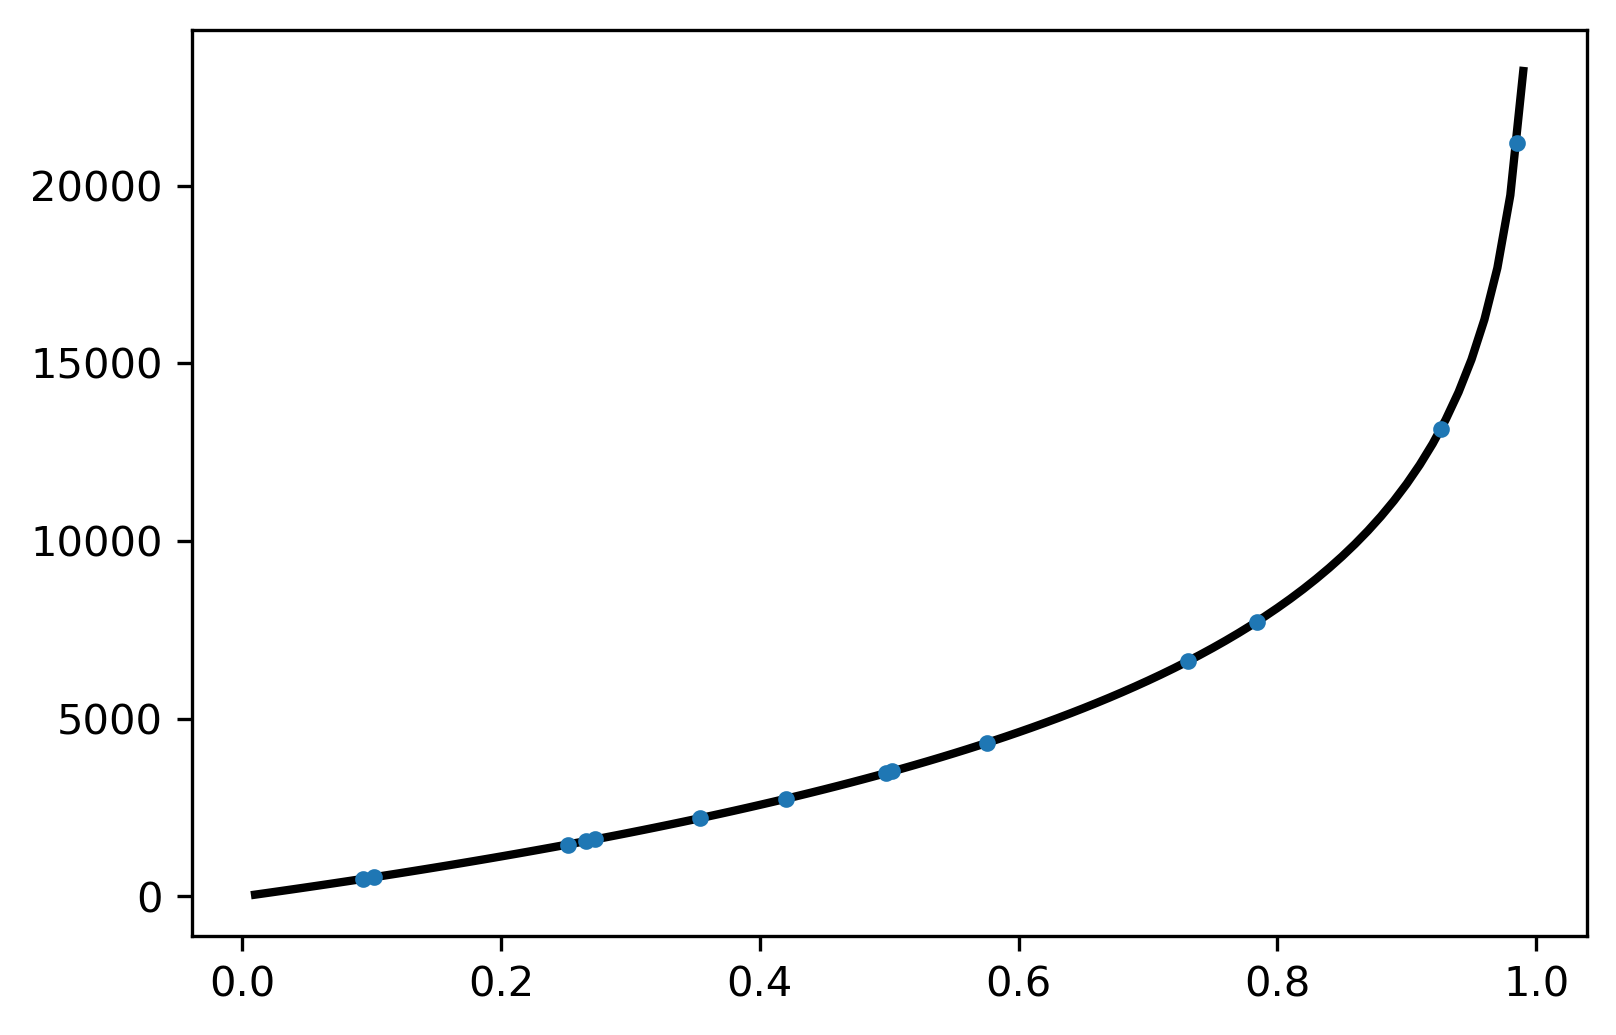

In [20]:
fig, ax = plt.subplots(dpi=300)
ax.plot(p, ecdf, 'k-', lw=2)
ax.plot(epdf, y, '.')

In [21]:
def likelihood(lambda_start,lambda_stop, y, n):
    y_sum = np.sum(y)
    lambda_grid = np.linspace(lambda_start, lambda_stop, 100)
    likelihood = (1 / (lambda_grid ** n)) * (np.exp(-np.sum(y)/lambda_grid))
    return likelihood, lambda_grid
    

In [22]:
llh_, lambda_grid = likelihood(2000, 15000, y, len(y))
llh_

array([2.83386451e-62, 1.02432308e-61, 3.03365390e-61, 7.62781011e-61,
       1.67431600e-60, 3.28008920e-60, 5.83795208e-60, 9.57686342e-60,
       1.46521773e-59, 2.11121726e-59, 2.88829301e-59, 3.77730857e-59,
       4.74952195e-59, 5.76978550e-59, 6.80013683e-59, 7.80320223e-59,
       8.74500958e-59, 9.59700141e-59, 1.03372056e-58, 1.09506412e-58,
       1.14291068e-58, 1.17705239e-58, 1.19780062e-58, 1.20588002e-58,
       1.20232110e-58, 1.18835957e-58, 1.16534752e-58, 1.13467893e-58,
       1.09773044e-58, 1.05581657e-58, 1.01015827e-58, 9.61862564e-59,
       9.11911731e-59, 8.61159677e-59, 8.10333953e-59, 7.60041744e-59,
       7.10778539e-59, 6.62938412e-59, 6.16825097e-59, 5.72663205e-59,
       5.30609166e-59, 4.90761542e-59, 4.53170561e-59, 4.17846721e-59,
       3.84768458e-59, 3.53888857e-59, 3.25141456e-59, 2.98445204e-59,
       2.73708638e-59, 2.50833368e-59, 2.29716937e-59, 2.10255147e-59,
       1.92343910e-59, 1.75880705e-59, 1.60765693e-59, 1.46902551e-59,
      

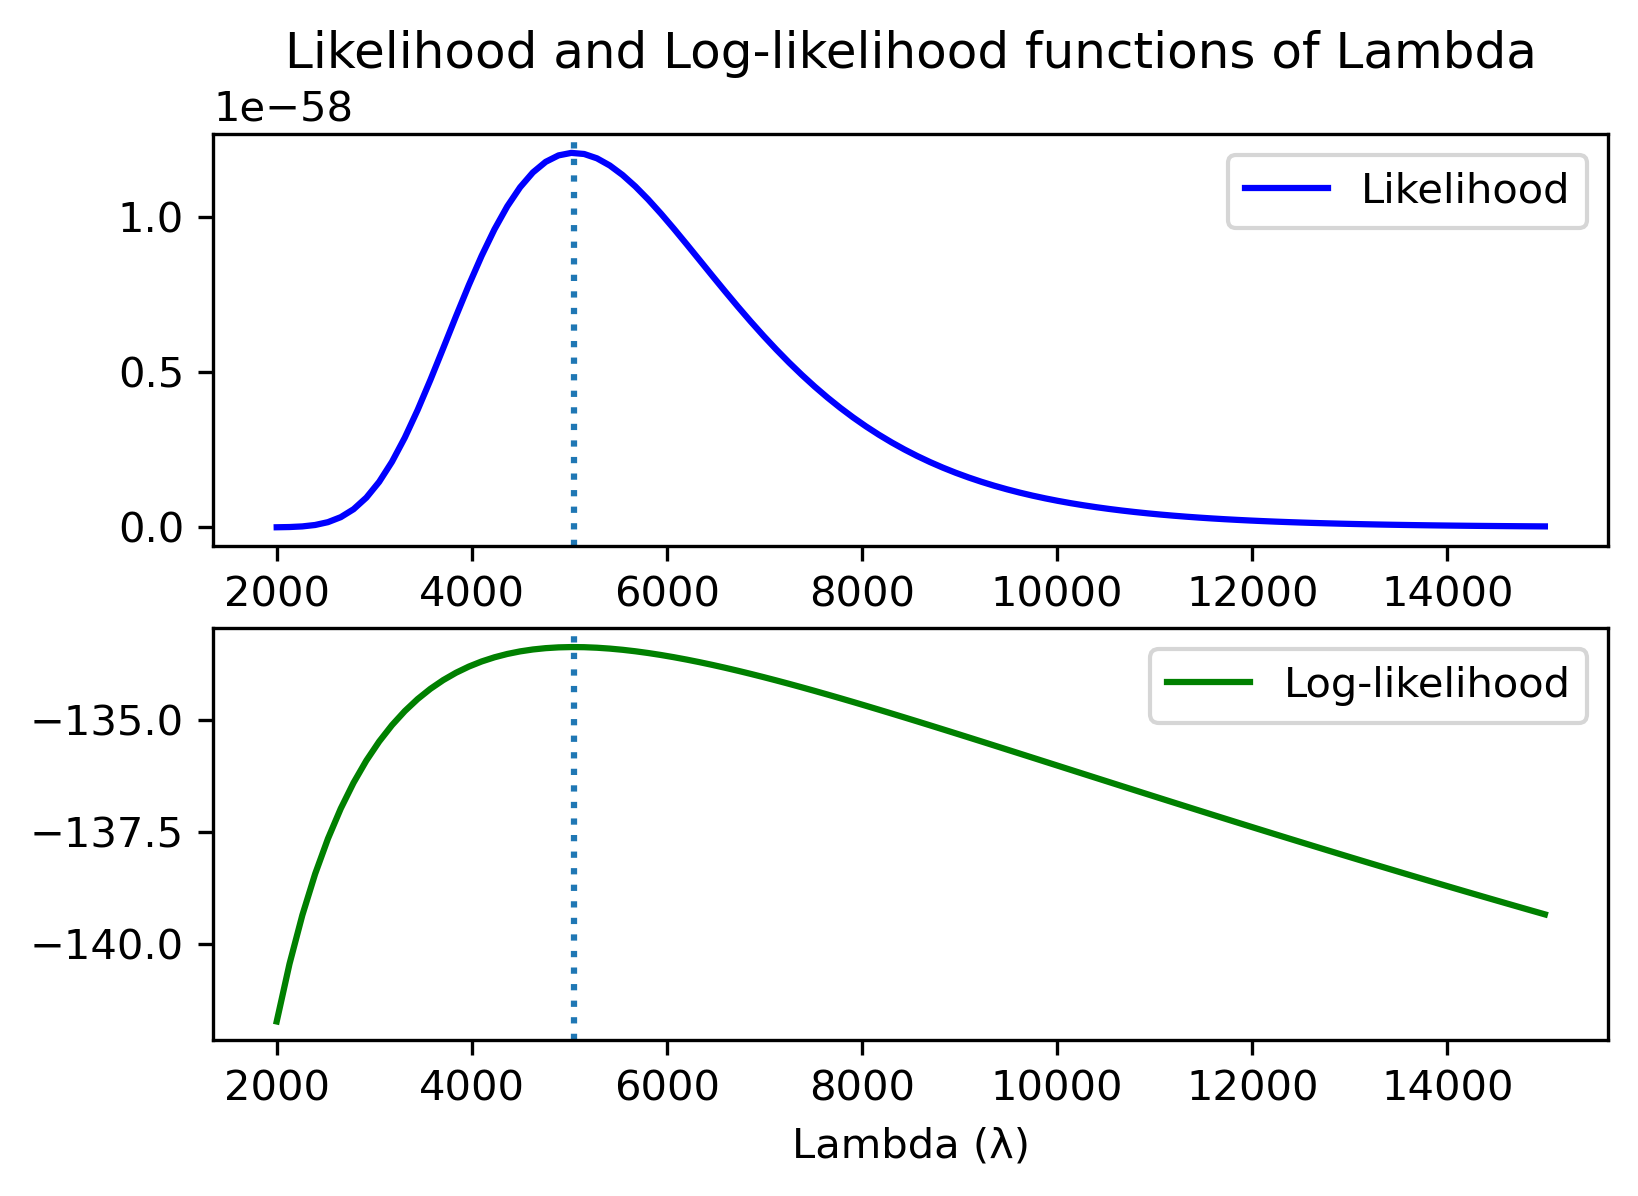

In [23]:

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300)
plt.xlabel('Lambda (λ)')
ax1.plot(lambda_grid, llh_, 'b-', label='Likelihood')
ax2.plot(lambda_grid, np.log(llh_), 'g-', label='Log-likelihood')
y_mle = y.mean()
ax1.axvline(y_mle, ls=':')
ax2.axvline(y_mle, ls=':')
ax1.legend()
ax2.legend()
plt.xlabel('Lambda (λ)')
ax1.set_title('Likelihood and Log-likelihood functions of Lambda', y=1.1)
plt.savefig('tht-likelihood-functions.jpg')

In [24]:
help(ax1.set_title)

Help on method set_title in module matplotlib.axes._axes:

set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set a title for the Axes.
    
    Set one of the three available Axes titles. The available titles
    are positioned above the Axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :

In [25]:
def ppv(alpha, beta=0.99, gamma=0.95):
    out = (beta*alpha)/((alpha*beta)+(1-alpha)*(1-gamma))
    return out

def npv(alpha, beta=0.99, gamma=0.95):
    out = (gamma*(1-alpha))/(alpha*(1-beta)+(1-alpha)*gamma)
    return out

ppv_v = np.vectorize(ppv)
npv_v = np.vectorize(npv)

In [26]:
alpha_star = 1/350
beta = 0.99
gamma = 0.95
alpha_star
alpha_grid = np.linspace(0, (10*alpha_star), 11)
alpha_grid

array([0.        , 0.00285714, 0.00571429, 0.00857143, 0.01142857,
       0.01428571, 0.01714286, 0.02      , 0.02285714, 0.02571429,
       0.02857143])

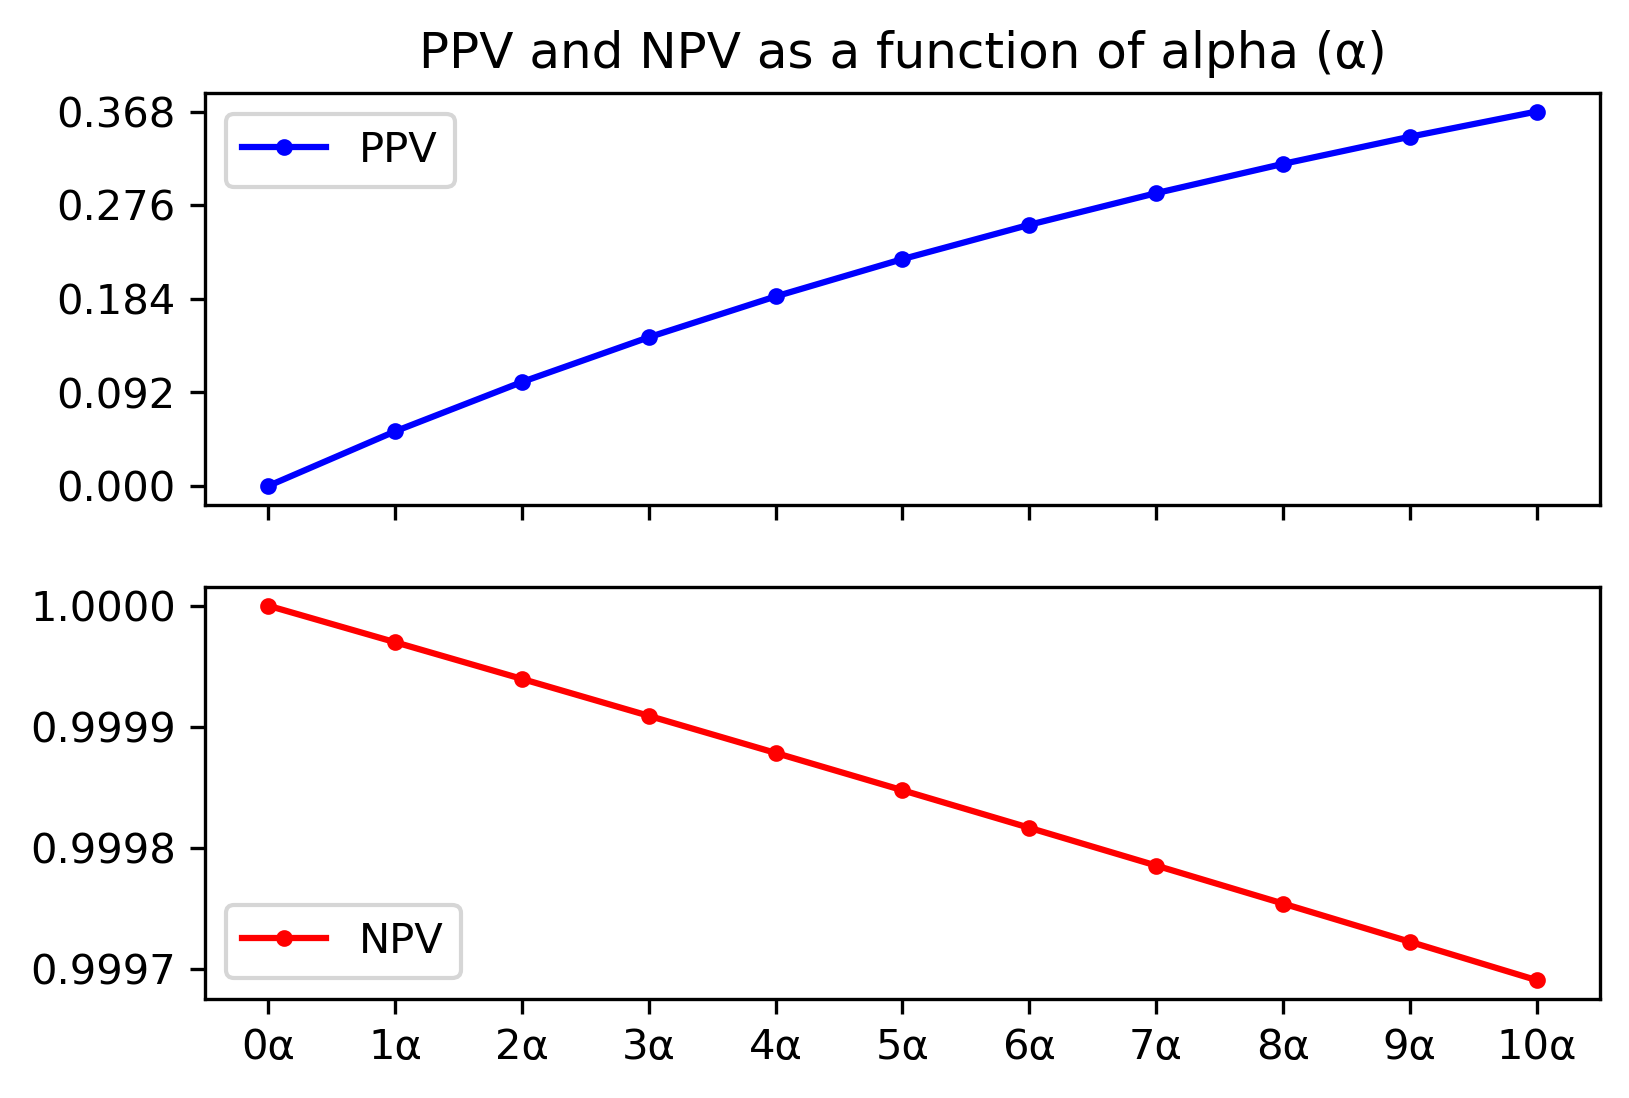

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300, sharex=True)
ax1.plot(alpha_grid, ppv_v(alpha_grid), 'b.-', label='PPV')
ax2.plot(alpha_grid, npv_v(alpha_grid), 'r.-', label='NPV')
plt.xticks(alpha_grid, labels =['{}α'.format(x) for x in range(len(alpha_grid))])
ax1.set_yticks(np.linspace(ppv_v(alpha_grid).min(), ppv_v(alpha_grid).max(), 5))
ax1.set_title('PPV and NPV as a function of alpha (α)')
ax1.legend()
ax2.legend(loc='lower left')
plt.savefig('tht-ppv-npv.jpg')